{'regions': [<pydrake.geometry.optimization.HPolyhedron object at 0x749177f29170>, <pydrake.geometry.optimization.HPolyhedron object at 0x749176942030>, <pydrake.geometry.optimization.HPolyhedron object at 0x7491769420f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x749184866bf0>, <pydrake.geometry.optimization.HPolyhedron object at 0x749177f130b0>, <pydrake.geometry.optimization.HPolyhedron object at 0x749177f11ff0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7491769f3330>, <pydrake.geometry.optimization.HPolyhedron object at 0x7491769f3df0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7491769f1b30>, <pydrake.geometry.optimization.HPolyhedron object at 0x749176f38730>, <pydrake.geometry.optimization.HPolyhedron object at 0x749176f3bb70>, <pydrake.geometry.optimization.HPolyhedron object at 0x749176f3aa70>, <pydrake.geometry.optimization.HPolyhedron object at 0x749176f3ac70>, <pydrake.geometry.optimization.HPolyhedron object at 0x7491741186b0>, <pydrak

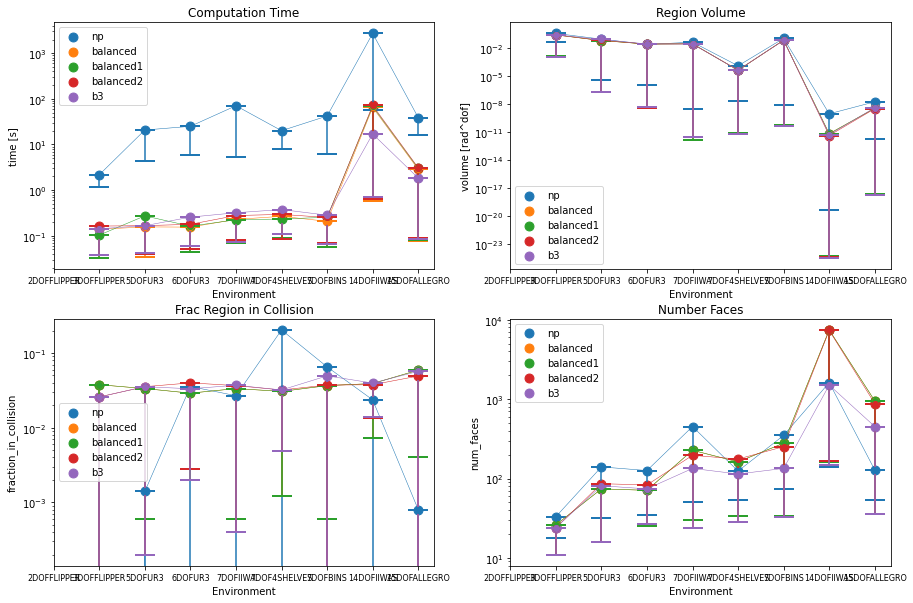

{'2DOFFLIPPER': {'default/config_medium': {}, 'fast_iris/unadaptive_balanced': {}, 'fast_iris/unadaptive_balanced_1': {}, 'fast_iris/unadaptive_balanced_2': {}, 'fast_iris/unadaptive_balanced_3': {}}, '3DOFFLIPPER': {'default/config_medium': {'mean_stats': [1.490734326839447, 2.406955858992455, 0.0, 26.09], 'min_stats': [1.1676063537597656, 0.6591264252271968, 0.0, 18], 'max_stats': [2.1709790229797363, 5.684871128789367, 0.0, 33]}, 'fast_iris/unadaptive_balanced': {'mean_stats': [0.05410353183746338, 1.2511846456732831, 0.00419, 17.05], 'min_stats': [0.03238654136657715, 0.01952217856496046, 0.0, 11], 'max_stats': [0.13836979866027832, 3.9615626901019567, 0.0376, 26]}, 'fast_iris/unadaptive_balanced_1': {'mean_stats': [0.05222249269485474, 1.2511846456732831, 0.00419, 17.05], 'min_stats': [0.032782793045043945, 0.01952217856496046, 0.0, 11], 'max_stats': [0.10331964492797852, 3.9615626901019567, 0.0376, 26]}, 'fast_iris/unadaptive_balanced_2': {'mean_stats': [0.06404835939407348, 1.25

In [1]:
import matplotlib.pyplot as plt
import os
import pickle
from iris_environments.environments import env_names
import numpy as np

def get_env_name(path):
    for e in env_names:
        if e in path:
            return e    

keys_stats = ['times', 'volumes', 'fraction_in_collision', 'num_faces']
axis_labels = ['time [s]', 'volume [rad^dof]', 'fraction_in_collision', 'num_faces']
stat_titles = ['Computation Time', 'Region Volume', 'Frac Region in Collision', 'Number Faces']

default_configs_to_plot = [#'config_1', 
                           #'config_2',
                        #    'config_3',
                        #'config_vfast',
                        #'config_fast',
                        'config_medium',
                           ]
data = {}
for e in env_names:
    data[e] = {}
    for c in default_configs_to_plot:
        data[e][f"default/{c}"] = {}

root = '.'#os.path.dirname(os.path.abspath(__file__))
for conf in default_configs_to_plot:
    default_exp_path = [e for e in os.listdir(root + f"/benchmarks/default_experiments/{conf}") if e.endswith('pkl')]
    for exp in default_exp_path:
        env_name = get_env_name(exp)
        with open(root + f"/benchmarks/default_experiments/{conf}/"+exp, 'rb') as f:
            result = pickle.load(f)
            
            data[env_name][f"default/{conf}"]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['max_stats'] = [ np.max(result[k]) for k in keys_stats]


experiments_to_add = [
    #'fast_iris/setting_1', 
    #'fast_iris/setting_2',
    #'fast_iris/config_1',
    #'sampled_iris/config_4',
    #'fast_iris/config_3',
    #'fast_iris/config_2',
    #'fast_iris/unadaptive_test_cfg_0',
    #'fast_iris/unadaptive_newtest_cfg_1'
    'fast_iris/unadaptive_balanced',
    'fast_iris/unadaptive_balanced_1',
    'fast_iris/unadaptive_balanced_2',
    'fast_iris/unadaptive_balanced_3',
    #'fast_iris/unadaptive_fast_cl',
    # 'fast_iris/unadaptive_fast_2',
    # 'fast_iris/unadaptive_fast_3',
    ]
names = ['np','balanced','balanced1','balanced2', 'b3', 'f3']
#"['2DOFFLIPPER_641ed63424.pkl', '3DOFFLIPPER_a33a92c6d1.pkl']

for exp_name in experiments_to_add:
    env_experiments = []
    for e in os.listdir(root+f"/logs/{exp_name}"):
        if e[-4:] == '.pkl':
            env_experiments.append(e)
    for e in env_names:
        data[e][exp_name] = {}
    for exp in env_experiments:
        env_name = get_env_name(exp)
        with open(root + f"/logs/{exp_name}/"+exp, 'rb') as f:
            result = pickle.load(f)
            data[env_name][exp_name]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][exp_name]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][exp_name]['max_stats'] = [ np.max(result[k]) for k in keys_stats]
            print(result)



with open('iris_environments/env_statistics.txt', 'r') as f:
    lines = f.readlines()
env_stats = {}
for l in lines[1:]:
    chunks = l.split(',')
    stats = [int(chunks[0]), float(chunks[1]), float(chunks[2])]
    env_stats[chunks[-1].strip('\n').strip(' ')] = stats

fig, axs = plt.subplots(nrows=2, ncols=2, figsize= (15,10))
axs_squeezed = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
for statid, (k, ax) in enumerate(zip(keys_stats, axs_squeezed)):
    experiments = list(data[env_names[0]].keys())
    for i_exp, exp in enumerate(experiments):
        xloc = []
        min_stats = []
        max_stats = []
        mean_stats = []
        vols = []
        for xl, e in enumerate(env_names):
            if 'mean_stats' in data[e][exp].keys():
                xloc.append(xl)
                min_stats.append(data[e][exp]['min_stats'][statid])
                max_stats.append(data[e][exp]['max_stats'][statid])
                mean_stats.append(data[e][exp]['max_stats'][statid])
                vols.append(env_stats[e][2])
        vols = np.array(vols)
        ax.set_yscale('log')
        if 'volume' in axis_labels[statid]:
            mean_stats /= vols
            min_stats /= vols
            max_stats /= vols
        ax.scatter(xloc, mean_stats, label = names[i_exp], s= 80)    
        err = [np.array(mean_stats) - np.array(min_stats),
               np.array(max_stats)- np.array(mean_stats)]#
        artist = ax.errorbar(xloc, mean_stats, yerr = err, fmt='o', capsize=10, capthick=2)
        ax.plot(xloc, mean_stats, linewidth = 0.5, color= artist.lines[0].get_color())
        ax.set_xlabel('Environment')
        ax.set_ylabel(axis_labels[statid])
        ax.set_xticks(range(len(env_names)))
        ax.set_xticklabels(env_names, fontsize = 8)
        ax.legend()
        ax.set_title(stat_titles[statid])
        
plt.show()
print(data)

